***Uploading the data and the libraries***

In [4]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("mnistdb/", one_hot=True)
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from sklearn.datasets import load_iris 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn import metrics
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp



%matplotlib inline

Extracting mnistdb/train-images-idx3-ubyte.gz
Extracting mnistdb/train-labels-idx1-ubyte.gz
Extracting mnistdb/t10k-images-idx3-ubyte.gz
Extracting mnistdb/t10k-labels-idx1-ubyte.gz


***Check the number of instances in each class (numbers 1 till 3)***

[50, 51, 51]


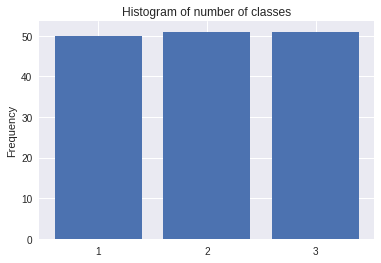

In [0]:
iris =load_iris()
X=iris.data
y=iris.target

class_distribution = [0,0,0]

# sum the number of instances in each class
for ele in y: 
        if (ele == 0): 
            class_distribution[0] = class_distribution[0] + 1
        if (ele == 1): 
            class_distribution[1] = class_distribution[0] + 1
        if (ele == 2): 
            class_distribution[2] = class_distribution[0] + 1


# number of classes
x =range(3)

# histogram of number of instances in each class
plt.bar(x= range(3),height=class_distribution)
plt.title('Histogram of number of classes')
plt.xlabel('')
plt.ylabel('Frequency')
plt.xticks(x, [1,2,3]);

print (class_distribution)

***Create a graph for Iris knn for different hyperparameter K and the accuracy***

The accuracy for the best K(=20) value: 0.98


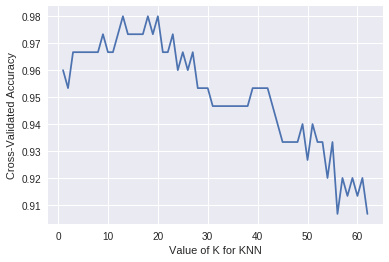

In [0]:
k_values = list(range(1,63))
k_scores = []

# Run the knn for a different hyperparameter K and check the accuracy
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    specific_k_scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(specific_k_scores.mean())

    
# Plot the corss validation accuracy as function of K

plt.plot(k_values, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

# Writing the best value for K and the best result
k_scores.reverse() #reversing the score list inorder to find the best accuracy of k from the end of the list
best_k = k_values[len(k_values)-k_scores.index(max(k_scores)) - 1]
knn = KNeighborsClassifier(n_neighbors = best_k)
print("The accuracy for the best K(={}) value: {}".format(*[best_k,cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean()]))

ROC graph for IRIS KNN

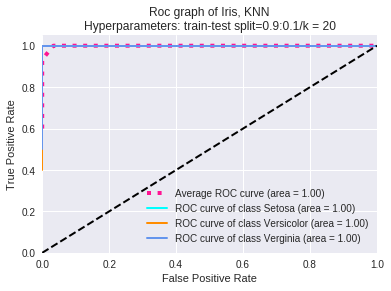

In [0]:
iris =load_iris()
X=iris.data
y=iris.target

y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]
Flowers_names =	{0: "Setosa", 1: "Versicolor", 2: "Verginia"}

# split training,validation and test sets according to the best performance
X_train_set, X_test, y_train_set, y_test = train_test_split(X, y, test_size=0.1,random_state=5) # X% training and 100-X% test

# Learn to predict each class against the other
classifier = OneVsRestClassifier(KNeighborsClassifier(n_neighbors = best_k))
y_score = classifier.fit(X_train_set, y_train_set).predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
lw=2

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='Average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)


colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(Flowers_names[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc graph of Iris, KNN\nHyperparameters: train-test split=0.9:0.1/k = 20')
plt.legend(loc="lower right")
plt.show()

***Check the number of instances in each class (numbers 1 till 10)***

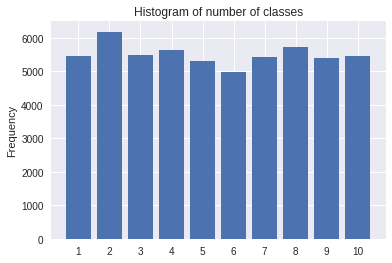

In [0]:
X_train=mnist.train.images
y_train=mnist.train.labels
X_validation=mnist.validation.images
y_validation=mnist.validation.labels
X_test=mnist.test.images
y_test=mnist.test.labels

# sum the number of instances in each class
class_distribution = np.sum( y_train, axis=0)

# number of classes
x =range(10)

# histogram of number of instances in each class
plt.bar(x= range(10),height=class_distribution)
plt.title('Histogram of number of classes')
plt.xlabel('')
plt.ylabel('Frequency')
plt.xticks(x, [1,2,3,4,5,6,7,8,9,10]);

***Create a graph for Mnist knn for different hyperparameter K and the accuracy***

The accuracy for the test set with the best K(=3) value: 0.9686


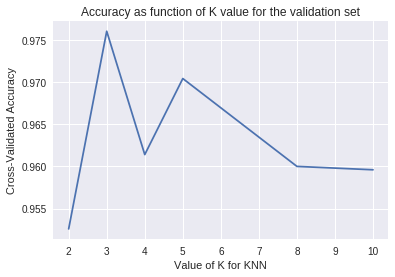

In [0]:
X_train=mnist.train.images
y_train=mnist.train.labels
X_validation=mnist.validation.images
y_validation=mnist.validation.labels
X_test=mnist.test.images
y_test=mnist.test.labels

k_values = list([2,3,4,5,8,10])
k_scores = []

# Run the knn for a different hyperparameter K and check the accuracy
for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  y_pred = knn.predict(X_validation)
  k_scores.append(metrics.accuracy_score(y_validation,y_pred))

# Plot the corss validation accuracy as function of K

plt.plot(k_values, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Accuracy as function of K value for the validation set')

# Writing the best value for K and the best result
k_scores.reverse() #reversing the score list inorder to find the best accuracy of k from the end of the list
best_k = k_values[len(k_values)-k_scores.index(max(k_scores)) - 1]
knn = KNeighborsClassifier(n_neighbors = best_k)
knn.fit(X_train,y_train)
y_pred_test = knn.predict(X_test)
print("The accuracy for the test set with the best K(={}) value: {}".format(*[best_k,metrics.accuracy_score(y_test, y_pred_test)]))

Roc graph for the Mnist Knn

In [0]:
X_train_all=mnist.train.images
y_train_all=mnist.train.labels
X_validation_all=mnist.validation.images
y_validation_all=mnist.validation.labels
X_test_all=mnist.test.images
y_test_all=mnist.test.labels

# Splitting each group for it's stratified sub-group for better run time, 20% of each grop selected
_, X_train, _, y_train = train_test_split(X_train_all, y_train_all, test_size=0.2,random_state=5)
_, X_validation, _, y_validation = train_test_split(X_validation_all, y_validation_all, test_size=0.2,random_state=5) 
_, X_test, _, y_test = train_test_split(X_test_all, y_test_all, test_size=0.2,random_state=5)

y_train_binary = label_binarize(y_train, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
n_classes = y_train_binary.shape[1]
Digits_names =	{0: "Zero", 1: "One", 2: "Two", 3: "Three", 4: "Four", 5: "Five", 6: "Six", 7: "Seven", 8: "Eight", 9: "Nine"}

# Learn to predict each class against the other
classifier = OneVsRestClassifier(KNeighborsClassifier(n_neighbors = 3))
y_score = classifier.fit(X_train, y_train_binary).predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
lw=2

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='Average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)


colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(Digits_names[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc graph of Mnist, KNN, Batch size = 20% of total size, k = 3')
plt.legend(loc="lower right")
plt.show()

***Create a graph for Iris SVM for different hyperparameters: C,kernel, Test split, Validation split and the accuracy***

In [0]:
iris =load_iris()
X=iris.data
y=iris.target

split_sets = [0.1,0.2,0.3]
C_values = list([1,5,10,15,30])
scores = [[[None for _ in range(len(C_values))] for _ in range(len(split_sets))] for _ in range(len(split_sets))]

# Run the SVM for a different hyperparameters and check the accuracy
# kernel='linear'
for split_data_test in range(len(split_sets)):
  
  X_data, X_test, y_data, y_test = train_test_split(X, y, test_size=split_sets[split_data_test],random_state=5) # X% training and 100-X% test
  for split_train_validation in range(len(split_sets)):
    
     for c in range(len(C_values)):
   
        X_train_set, X_validation_set, y_train_set, y_validation_set = train_test_split(X_data, y_data, test_size=split_sets[split_train_validation],random_state=5) # X% training and 100-X% validation
        svm_model = svm.SVC(kernel='linear', C=C_values[c])
        svm_model.fit(X_train_set, y_train_set)
        y_validation_pred = svm_model.predict(X_validation_set)
        scores[split_data_test][split_train_validation][c] = metrics.accuracy_score(y_validation_set, y_validation_pred)


scores=np.asarray(scores).reshape(len(split_sets),len(split_sets),len(C_values))
print("The matrix for each hyperparameter(data-test split/data-validation split/c/\033[1mkernel = 'linear'\033[0;0m): accordingly with the accuracy for data-validation split:")
print (scores)

X_data, X_test, y_data, y_test = train_test_split(X, y, test_size=0.1,random_state=5) # X% training and 100-X% test
X_train_set, X_validation_set, y_train_set, y_validation_set = train_test_split(X_data, y_data, test_size=0.2,random_state=5) # X% training and 100-X% validation
svm_model = svm.SVC(kernel ='linear', C=5)
svm_model.fit(X_train_set, y_train_set)
y_test_pred = svm_model.predict(X_test)
print ("\n\nThe accuaracy on the test is(with hyperparameters data-test split=0.9:0.1/data-validation split=0.8:0.2/c=5/kernel = 'linear'):{}".format(metrics.accuracy_score(y_test, y_test_pred)))


# kernel='rbf'
print("\n\n\n")
for split_data_test in range(len(split_sets)):
  
  X_data, X_test, y_data, y_test = train_test_split(X, y, test_size=split_sets[split_data_test],random_state=5) # X% training and 100-X% test
  for split_train_validation in range(len(split_sets)):
    
     for c in range(len(C_values)):
        
        X_train_set, X_validation_set, y_train_set, y_validation_set = train_test_split(X_data, y_data, test_size=split_sets[split_train_validation],random_state=5) # X% training and 100-X% validation
        svm_model = svm.SVC(kernel='rbf', C=C_values[c], gamma=1)
        svm_model.fit(X_train_set, y_train_set)
        y_validation_pred = svm_model.predict(X_validation_set)
        scores[split_data_test][split_train_validation][c] = metrics.accuracy_score(y_validation_set, y_validation_pred)

scores=np.asarray(scores).reshape(len(split_sets),len(split_sets),len(C_values))
print("The matrix for each hyperparameter(data-test split/data-validation split/c/\033[1mkernel = 'rbf'\033[0;0m): accordingly with the accuracy for data-validation split:")
print (scores)

X_data, X_test, y_data, y_test = train_test_split(X, y, test_size=0.1,random_state=5) # X% training and 100-X% test
X_train_set, X_validation_set, y_train_set, y_validation_set = train_test_split(X_data, y_data, test_size=0.2,random_state=5) # X% training and 100-X% validation
svm_model = svm.SVC(kernel='rbf', C=C_values[c], gamma=1)
svm_model.fit(X_train_set, y_train_set)
y_test_pred = svm_model.predict(X_test)
print ("\n\nThe accuaracy on the test is(with hyperparameters data-test split=0.9:0.1/data-validation split=0.8:0.2/c=5/kernel='rbf'):{}".format(metrics.accuracy_score(y_test, y_test_pred)))

The matrix for each hyperparameter(data-test split/data-validation split/c/kernel = 'linear'): accordingly with the accuracy for data-validation split:
[[[1.         1.         1.         1.         1.        ]
  [1.         1.         1.         1.         1.        ]
  [1.         0.97560976 1.         0.97560976 0.97560976]]

 [[1.         1.         1.         1.         1.        ]
  [1.         1.         1.         1.         1.        ]
  [1.         0.97222222 0.97222222 0.97222222 0.97222222]]

 [[1.         1.         1.         1.         1.        ]
  [1.         1.         1.         1.         1.        ]
  [1.         1.         0.96875    0.96875    0.96875   ]]]


The accuaracy on the test is(with hyperparameters data-test split=0.9:0.1/data-validation split=0.8:0.2/c=5/kernel = 'linear'):0.933333333333




The matrix for each hyperparameter(data-test split/data-validation split/c/kernel = 'rbf'): accordingly with the accuracy for data-validation split:
[[[1.         

Roc graphs:

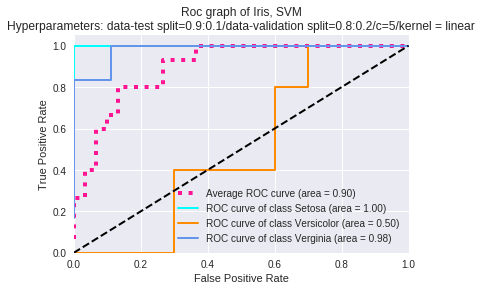

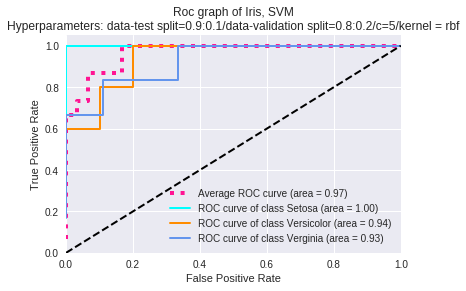

In [0]:
iris =load_iris()
X=iris.data
y=iris.target

y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]
Flowers_names =	{0: "Setosa", 1: "Versicolor", 2: "Verginia"}

# split training,validation and test sets according to the best performance
X_data, X_test, y_data, y_test = train_test_split(X, y, test_size=0.1,random_state=5) # X% training and 100-X% test
X_train_set, X_validation_set, y_train_set, y_validation_set = train_test_split(X_data, y_data, test_size=0.2,random_state=5) # X% training and 100-X% validation

# -----------------------------------------------------------------  Kernel  =  linear  ----------------------------------------------------------

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear',C= 5, probability=True, random_state=5))
y_score = classifier.fit(X_train_set, y_train_set).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
lw=2

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='Average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)


colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(Flowers_names[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc graph of Iris, SVM\nHyperparameters: data-test split=0.9:0.1/data-validation split=0.8:0.2/c=5/kernel = linear')
plt.legend(loc="lower right")
plt.show()

# -----------------------------------------------------------------  Kernel  =  rbf  ----------------------------------------------------------

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='rbf',gamma=1,C=5, probability=True, random_state=5))
y_score = classifier.fit(X_train_set, y_train_set).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
lw=2

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='Average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)


colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(Flowers_names[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc graph of Iris, SVM\nHyperparameters: data-test split=0.9:0.1/data-validation split=0.8:0.2/c=5/kernel = rbf')
plt.legend(loc="lower right")
plt.show()






***Create a graph for Mnist SVM for different hyperparameters: C,kernel and the accuracy***

In [0]:
def convert_labels_1D(Array):
  flat_array =[]
  i = 0
  while i < len(Array):
    value_index = np.argmax(Array[i])
    flat_array.append(value_index)     
    i+=1
  return(np.asarray(flat_array))


X_train_all=mnist.train.images
y_train_all=mnist.train.labels
X_validation_all=mnist.validation.images
y_validation_all=mnist.validation.labels
X_test_all=mnist.test.images
y_test_all=mnist.test.labels

# Splitting each group for it's stratified sub-group for better run time, 10% of each grop selected
_, X_train, _, y_train = train_test_split(X_train_all, y_train_all, test_size=0.1,random_state=5)
_, X_validation, _, y_validation = train_test_split(X_validation_all, y_validation_all, test_size=0.1,random_state=5) 
_, X_test, _, y_test = train_test_split(X_test_all, y_test_all, test_size=0.1,random_state=5) 


split_sets = [0.1,0.2,0.3]
C_values = list([1,5,10])
scores = [None for _ in range(len(C_values))]
flat_y_train = []
flat_y_validation = []
y_test_flat=[]

flat_y_train=convert_labels_1D(y_train)
flat_y_validation=convert_labels_1D(y_validation)
flat_y_test=convert_labels_1D(y_test)
  


# Run the SVM for a different hyperparameters and check the accuracy
# kernel='linear'

  
for c in range(len(C_values)):
  classifier = OneVsRestClassifier(svm.SVC(kernel='linear', C=C_values[c], probability=True, random_state=5))
  classifier.fit(X_train, flat_y_train)
  y_validation_pred = classifier.predict(X_validation)
  scores[c] = metrics.accuracy_score(flat_y_validation,y_validation_pred)
                               


print("The matrix for each hyperparameter(c/\033[1mkernel = 'linear'\033[0;0m): accordingly with the accuracy for data-validation split:")
print (scores)

scores.reverse() #reversing the score list inorder to find the best accuracy of k from the end of the list
best_c = C_values[len(C_values)-scores.index(max(scores)) - 1]
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', C=best_c, probability=True, random_state=5))
classifier.fit(X_train, flat_y_train)
y_test_pred = classifier.predict(X_test)

print ("\n\nThe accuaracy on the test is(with hyperparameters c={}/kernel = 'linear'):{}".format(*[best_c,metrics.accuracy_score(flat_y_test,y_test_pred)]))

print('\n\n')
#kernel = rbf

  
for c in range(len(C_values)):
  classifier = OneVsRestClassifier(svm.SVC(kernel='rbf', C=C_values[c], probability=True, random_state=5))
  classifier.fit(X_train, flat_y_train)
  y_validation_pred = classifier.predict(X_validation)
  scores[c] = metrics.accuracy_score(flat_y_validation,y_validation_pred)
                               


print("The matrix for each hyperparameter(c/\033[1mkernel = 'rbf'\033[0;0m): accordingly with the accuracy for data-validation split:")
print (scores)

scores.reverse() #reversing the score list inorder to find the best accuracy of k from the end of the list
best_c = C_values[len(C_values)-scores.index(max(scores)) - 1]
classifier = OneVsRestClassifier(svm.SVC(kernel='rbf', C=best_c, probability=True, random_state=5))
classifier.fit(X_train, flat_y_train)
y_test_pred = classifier.predict(X_test)

print ("\n\nThe accuaracy on the test is(with hyperparameters c={}/kernel = 'rbf'):{}".format(*[best_c,metrics.accuracy_score(flat_y_test,y_test_pred)]))


The matrix for each hyperparameter(c/kernel = 'linear'): accordingly with the accuracy for data-validation split:
[0.909, 0.888, 0.878]


The accuaracy on the test is(with hyperparameters c=1/kernel = 'linear'):0.9



The matrix for each hyperparameter(c/kernel = 'rbf'): accordingly with the accuracy for data-validation split:
[0.906, 0.926, 0.937]


The accuaracy on the test is(with hyperparameters c=10/kernel = 'rbf'):0.93


ROC FOR Mnist SVM

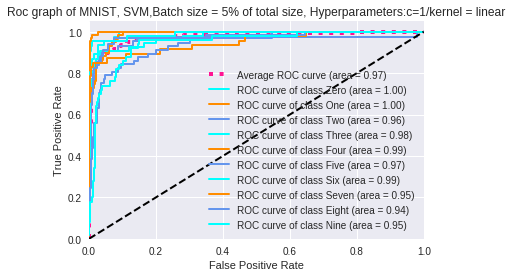

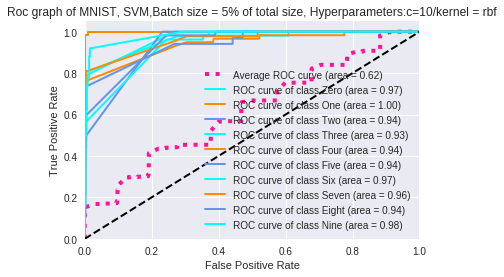

In [6]:
X_train_all=mnist.train.images
y_train_all=mnist.train.labels
X_validation_all=mnist.validation.images
y_validation_all=mnist.validation.labels
X_test_all=mnist.test.images
y_test_all=mnist.test.labels

# Splitting each group for it's stratified sub-group for better run time, 5% of each grop selected
_, X_train_set, _, y_train_set = train_test_split(X_train_all, y_train_all, test_size=0.05,random_state=5)
_, X_validation_set, _, y_validation_set = train_test_split(X_validation_all, y_validation_all, test_size=0.05,random_state=5) 
_, X_test_set, _, y_test_set = train_test_split(X_test_all, y_test_all, test_size=0.05,random_state=5)

y_train_binary = label_binarize(y_train_set, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
n_classes = y_train_binary.shape[1]
Digits_names =	{0: "Zero", 1: "One", 2: "Two", 3: "Three", 4: "Four", 5: "Five", 6: "Six", 7: "Seven", 8: "Eight", 9: "Nine"}

# -----------------------------------------------------------------  Kernel  =  linear  ----------------------------------------------------------

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear',C= 1, probability=True, random_state=5))
y_score = classifier.fit(X_train_set, y_train_set).decision_function(X_test_set)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_set[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_set.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
lw=2

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='Average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)


colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(Digits_names[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc graph of MNIST, SVM,Batch size = 5% of total size, Hyperparameters:c=1/kernel = linear')
plt.legend(loc="lower right")
plt.show()

# -----------------------------------------------------------------  Kernel  =  rbf  ----------------------------------------------------------

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='rbf',gamma=1,C=10, probability=True, random_state=5))
y_score = classifier.fit(X_train_set, y_train_set).decision_function(X_test_set)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_set[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_set.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
lw=2

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='Average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)


colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(Digits_names[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc graph of MNIST, SVM,Batch size = 5% of total size, Hyperparameters:c=10/kernel = rbf')
plt.legend(loc="lower right")
plt.show()
